## Imports

In [28]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

## Creating datasets

In [29]:
df = pd.read_csv("data/labeled_snowy_5.csv")

display(df.head(5))

columns = df.columns[4:]

x_labels = columns[1:]
y_labels = columns[0]

print("Input features: ", end="")
print(*x_labels, sep=", ")
print("Class Labels ", y_labels)


data = df[columns].values.astype(np.float32)

noise_indices = np.where(data[:,0] == 1)[0]
real_indices = np.where(data[:,0] == 0)[0]

np.random.shuffle(noise_indices)
np.random.shuffle(real_indices)


x_test_indices = np.concatenate((noise_indices[:250], real_indices[:2000]))
x_val_indices = np.concatenate((noise_indices[250:500], real_indices[2000:4000]))
x_train_indices = np.concatenate((noise_indices[500:], real_indices[4000:]))


x_train = data[x_train_indices, 1:]
y_train = data[x_train_indices, 0]

x_val = data[x_val_indices, 1:]
y_val = data[x_val_indices, 0]


x_test = data[x_test_indices, 1:]
y_test = data[x_test_indices, 0]

total_points = len(data)
positive_points = len(noise_indices)

print(f"Non-Noise Points: {total_points - positive_points}/{total_points} ({(total_points - positive_points)/total_points:.3f}%)")
print(f"Noise Points:{positive_points}/{total_points} ({positive_points/total_points:.3f}%)")


,X,Y,Z,__rangexy,Noise,Normal change rate,Number of neighbors,Surface density,Omnivariance,Eigenentropy,Anisotropy,Planarity,Linearity,Surface variation,Sphericity,Verticality,3rd eigenvalue
0,3.286,2.673,-0.996,4.236,1.0,0.010093,983.0,1251.594482,0.010354,0.259228,0.986132,0.346270,0.639862,0.010093,0.013868,0.056737,0.000840
1,3.419,2.662,-0.938,4.333,1.0,0.011580,1411.0,1796.540894,0.013134,0.292883,0.982632,0.465111,0.517521,0.011580,0.017368,0.064407,0.001123
2,3.592,2.680,-0.886,4.482,1.0,0.011959,1861.0,2369.498779,0.015455,0.322546,0.980218,0.614534,0.365685,0.011959,0.019782,0.070589,0.001316
3,3.105,0.585,-0.767,3.160,1.0,0.063361,526.0,669.723999,0.011130,0.191430,0.911196,0.223945,0.687251,0.063361,0.088804,0.003578,0.003264
4,3.253,-0.561,-0.802,3.301,1.0,0.048970,1266.0,1611.921265,0.013326,0.224003,0.926413,0.355537,0.570876,0.048970,0.073587,0.043278,0.003103


Input features: Normal change rate, Number of neighbors, Surface density, Omnivariance, Eigenentropy, Anisotropy, Planarity, Linearity, Surface variation, Sphericity, Verticality, 3rd eigenvalue
Class Labels  Noise
Non-Noise Points: 102577/105815 (0.969%)
Noise Points:3238/105815 (0.031%)


## Training

In [30]:
rf = RandomForestClassifier(n_estimators=150, max_depth=10, random_state=0, n_jobs=5)

rf = rf.fit(x_train, y_train)

print(f"Train Accuracy: {rf.score(x_train, y_train):.3f}")
print(f"Validation Accuracy: {rf.score(x_val, y_val):.3f}")
print(f"Test Accuracy: {rf.score(x_test, y_test):.3f}")

Train Accuracy: 0.995
Validation Accuracy: 0.977
Test Accuracy: 0.973


## Feature Importance MDI

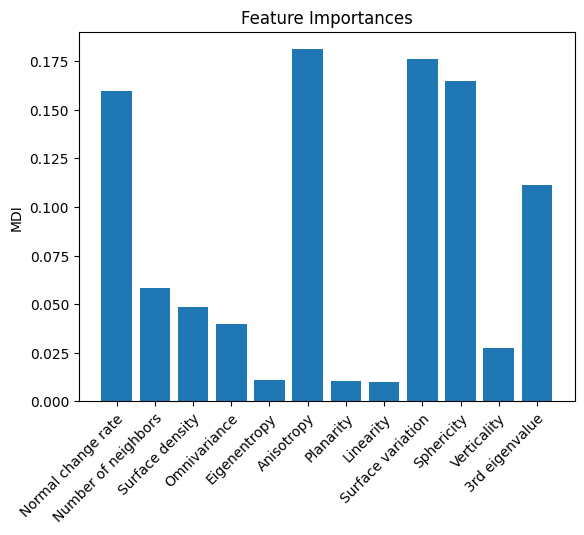

In [31]:
importances = rf.feature_importances_

std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)


plt.bar(x_labels, importances, align="center")
plt.xticks(rotation=45, rotation_mode="anchor", ha="right")
plt.title("Feature Importances")
plt.ylabel("MDI")

plt.show()

## Creating New Dataset with RF predictions

In [34]:
destination = "data/RF_predictions.csv"

prediction = rf.predict(data[:,1:])

df['RF_Predictions'] = prediction

new_df = df[['X', 'Y', 'Z', '__rangexy', 'Noise', 'RF_Predictions']]
new_df.to_csv(destination, index=False)